In [350]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
from sklearn.metrics import classification_report

import math
from sklearn.model_selection import cross_val_score

<AxesSubplot:>

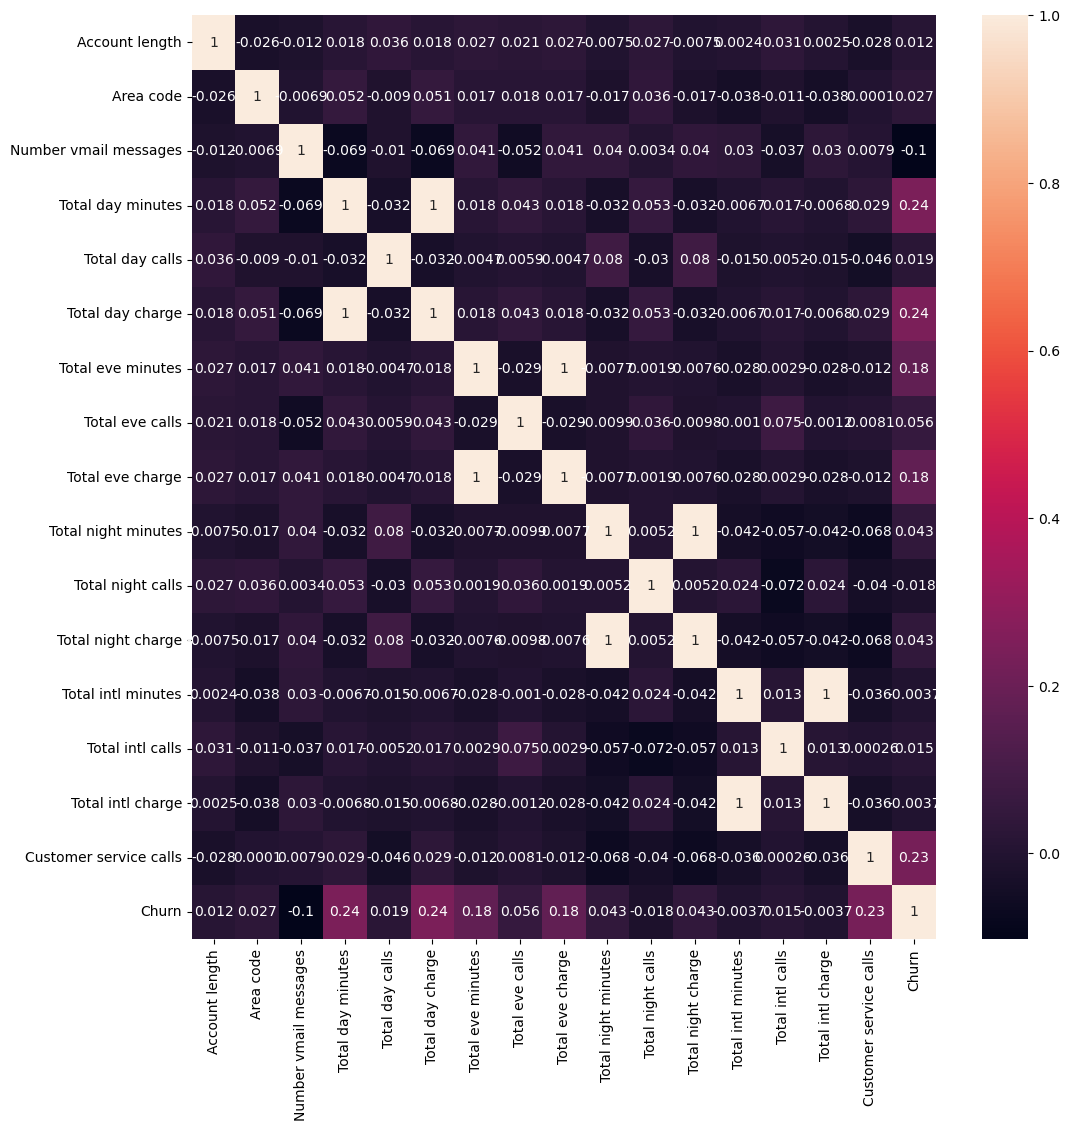

In [351]:
train = pd.read_csv('churn-bigml-80.csv')
plt.figure(figsize=(12,12))
sns.heatmap(test.corr(),annot=True)

<AxesSubplot:>

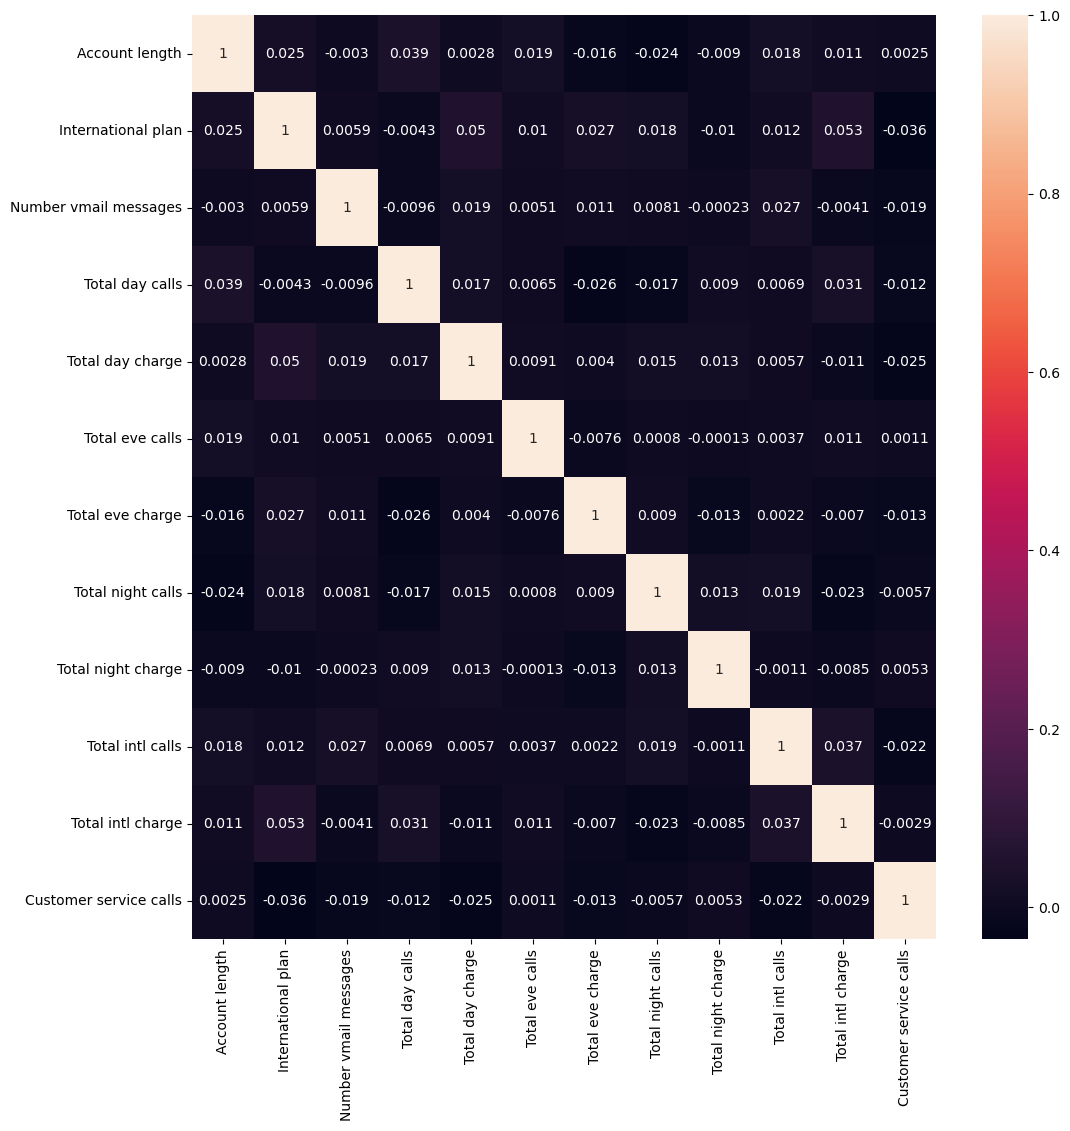

In [352]:
plt.figure(figsize=(12,12))
sns.heatmap(x_train.corr(),annot=True)

In [353]:
x_train = train.drop(columns = ['State','Churn'])
x_train.replace({'Voice mail plan':
                 {'Yes':1,
                  'No':0} 
                , 'International plan':
                 {'Yes':1,
                  'No':0}    
                 }, inplace = True)
x_train.drop(['Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl minutes','Area code','Voice mail plan'], axis=1, inplace = True)


In [354]:
test = pd.read_csv('churn-bigml-20.csv')

In [355]:
x_test = test.drop(columns = ['State','Churn'])
x_test.replace({'Voice mail plan':
                 {'Yes':1,
                  'No':0} 
                , 'International plan':
                 {'Yes':1,
                  'No':0}    
                 }, inplace = True)
x_test.drop(['Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl minutes','Area code','Voice mail plan'], axis=1, inplace = True)


In [356]:
y_test = test['Churn']
y_test = y_test.map({False:0,True:1})
y_train = train['Churn']
y_train = y_train.map({False:0,True:1})

In [357]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [358]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
tensorflow.keras.metrics.BinaryAccuracy

keras.metrics.accuracy_metrics.BinaryAccuracy

In [413]:
model = models.Sequential()

model.add(layers.Dense(128, activation="relu", input_shape = (12,)))
model.add(layers.Dense(1, activation="sigmoid"))


loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits=True,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="binary_crossentropy",
)
model.compile(optimizer="adam",
              loss=loss_fn,
              metrics=["accuracy"])
x_test.shape  

(667, 12)

In [415]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=15, batch_size=512)

Epoch 1/15
6/6 [==============================] - 0s 10ms/step - loss: 0.4224 - accuracy: 0.8436 - val_loss: 0.4026 - val_accuracy: 0.8531
Epoch 2/15
6/6 [==============================] - 0s 5ms/step - loss: 0.4152 - accuracy: 0.8515 - val_loss: 0.4046 - val_accuracy: 0.8186
Epoch 3/15
6/6 [==============================] - 0s 5ms/step - loss: 0.4081 - accuracy: 0.8507 - val_loss: 0.3927 - val_accuracy: 0.8441
Epoch 4/15
6/6 [==============================] - 0s 5ms/step - loss: 0.4008 - accuracy: 0.8515 - val_loss: 0.3892 - val_accuracy: 0.8456
Epoch 5/15
6/6 [==============================] - 0s 5ms/step - loss: 0.3940 - accuracy: 0.8545 - val_loss: 0.3920 - val_accuracy: 0.8411
Epoch 6/15
6/6 [==============================] - 0s 5ms/step - loss: 0.3879 - accuracy: 0.8518 - val_loss: 0.3853 - val_accuracy: 0.8456
Epoch 7/15
6/6 [==============================] - 0s 5ms/step - loss: 0.3842 - accuracy: 0.8537 - val_loss: 0.3838 - val_accuracy: 0.8411
Epoch 8/15
6/6 [=================

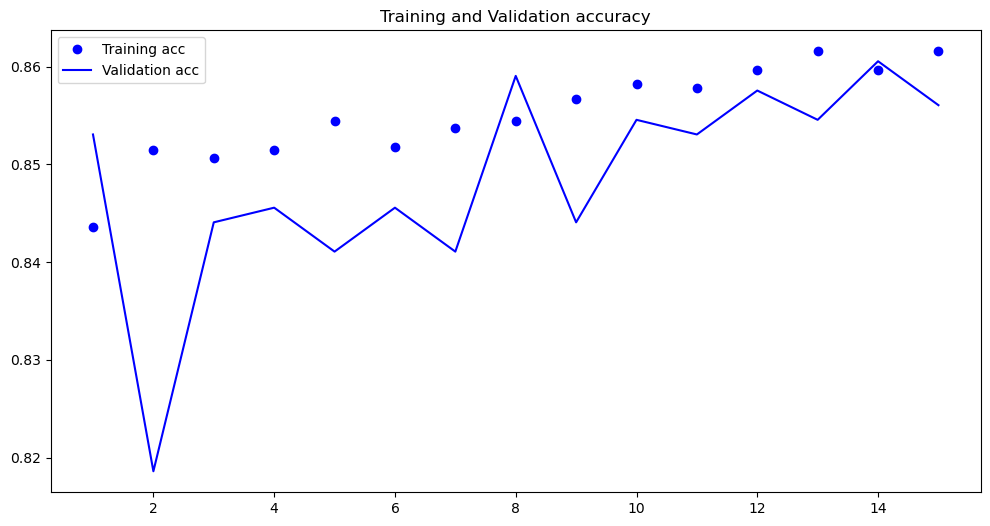

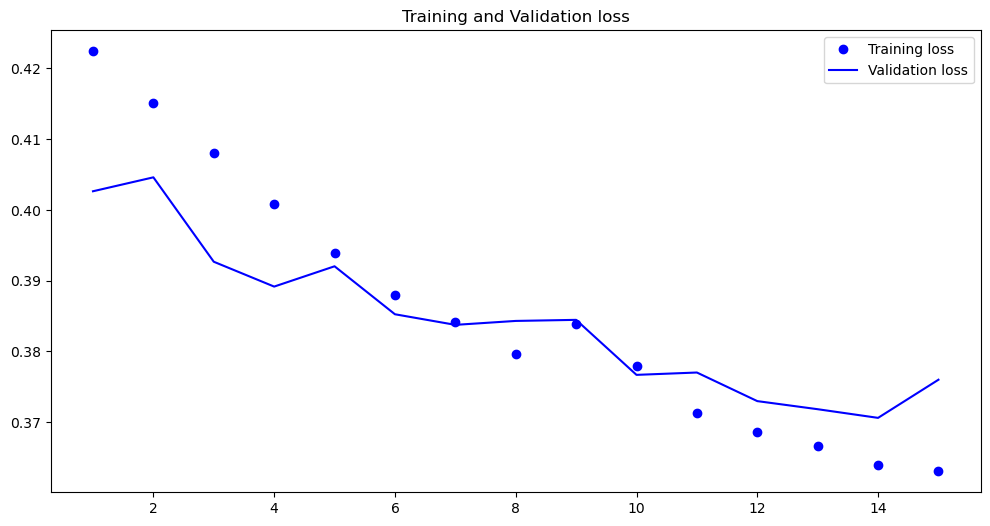

In [416]:
import matplotlib.pyplot as plt
# графики
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [417]:
predictions = model.predict(x_test)
pred = np.around(predictions)

cm = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred), cm)
y_test = pd.DataFrame(y_test)
y_test.value_counts()

21/21 [==============================] - 0s 550us/step
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       572
         1.0       0.48      0.15      0.23        95

    accuracy                           0.86       667
   macro avg       0.68      0.56      0.57       667
weighted avg       0.82      0.86      0.82       667
 [[557  15]
 [ 81  14]]


0.0    572
1.0     95
dtype: int64

In [418]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators = 100)
Y_test = test['Churn']
Y_test = Y_test.map({False:0,True:1})
Y_train = train['Churn']
Y_train = Y_train.map({False:0,True:1})


In [419]:
ford = cl.fit(x_train, Y_train)

In [420]:
pred_new111 = ford.predict(x_test)

In [421]:
cm12 = confusion_matrix(Y_test, pred_new111)
print(classification_report(Y_test, pred_new111), cm12)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       572
           1       0.95      0.64      0.77        95

    accuracy                           0.94       667
   macro avg       0.95      0.82      0.87       667
weighted avg       0.94      0.94      0.94       667
 [[569   3]
 [ 34  61]]


In [425]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train, Y_train)
pred_new2 = pipe.predict(x_test)
cm_new2 = confusion_matrix(Y_test, pred_new2)
print(classification_report(Y_test, pred_new2), cm_new2)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       572
           1       0.86      0.46      0.60        95

    accuracy                           0.91       667
   macro avg       0.89      0.73      0.78       667
weighted avg       0.91      0.91      0.90       667
 [[565   7]
 [ 51  44]]
